<a href="https://colab.research.google.com/github/sam2377/DL_Medical_Image_Analysis/blob/master/Code/Lecture1/A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
# from google.colab import drive
# drive.mount('/content/gdrive')

# Assignment 1

* In this assignment, we will use SVM and KNN to classify MNIST dataset.

* import the necessary packages

In [85]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets  import load_digits
from keras.utils import np_utils
from sklearn.neighbors import KNeighborsClassifier
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

* desplay ramdom images in dataset (10 images)

In [86]:
def display(array):
    #Displays 10 random images 
    n = 10
    indices = np.random.randint(len(array), size=n)
    images = array[indices, :]
    plt.figure(figsize=(20, 4))
    for i in range(10):
        image = images[i, :]
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image.reshape(8, 8))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

* load MINST dataset

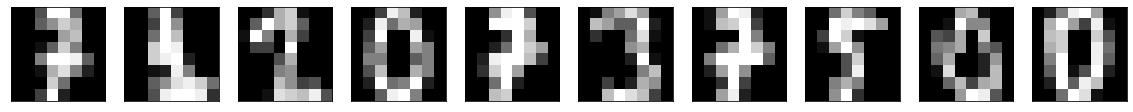

In [87]:
num_classes = 10
# the data, split between train and test sets
mnist = load_digits()
x_train, x_test, y_train, y_test = train_test_split(mnist.data,mnist.target,test_size=0.25,random_state=40)
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# show dataset
display(x_train)

1.1 Use SVM to classify 10 categories
* Use: sklearn SVC

In [88]:
model = SVC(kernel='linear', probability=True, decision_function_shape='ovo')
model.fit(x_train, y_train)
predicted = model.predict(x_test)

* Show Accuracy

In [89]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, predicted)
print('accuracy:', accuracy)

accuracy: 0.86


1.2 Use KNN to classify 10 categories

In [90]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
# use KNN model
model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train, y_train)
predicted = model.predict(x_test)

* Show Accuracy

In [91]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, predicted)
print('accuracy:', accuracy)

accuracy: 0.9733333333333334



1.3 Use NN to classify 10 categories
* Use: keras Sequential


In [92]:

# from keras.utils.vis_utils import plot_model
input_shape = (8, 8, 1)
model = Sequential()
model.add(Dense(256))
model.add(Dense(128))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train)
predicted = model.predict(x_test)
# plot_model(model, to_file='/content/gdrive/MyDrive/convolutional_neural_network.png', show_shapes=True)


43/43 [==============================] - 0s 2ms/step - loss: 2.1304 - accuracy: 0.4707


* Show Accuracy

In [93]:
score = 0
for idx, img in enumerate(x_test):
  if np.where(predicted[idx]==np.max(predicted[idx])) == np.where(y_test[idx]==np.max(y_test[idx])): 
    score = score+1
score = score/ len(y_test)
print('accuracy:', score)

accuracy: 0.7533333333333333


Bonus: please write KNN by yourself

* Build KNN

In [94]:
mnist = load_digits()
x_train, x_test, y_train, y_test = train_test_split(mnist.data,mnist.target,test_size=0.25,random_state=40)
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

k=7
train_img_len = x_train.shape[0] 
prediction = []

for idx, img in enumerate(x_test):
  distence = np.zeros(train_img_len)
  label = y_train
  # print(label)
  for i in range(train_img_len):
    dist = math.sqrt(sum((img - x_train[i])**2))
    distence[i] = dist
  p = distence.argsort()
  KNN = []
  for i in range(k):
    KNN.append(label[p[i]])
  predict = max(KNN, key=KNN.count)
  prediction.append(predict)

* Show Accuracy

In [95]:
score = 0
for idx, img in enumerate(x_test): 
  if prediction[idx]==y_test[idx]:
    score = score+1
score = score/ len(y_test)
print(score)

0.9755555555555555
